In [1]:
import torch
import torchvision
from datetime import datetime, timedelta
import os
import numpy as np
import torch.utils.data
import matplotlib.pyplot as plt
import cv2

In [3]:
def path2datetime(path: str) -> datetime:
    '''Takes string of the form "2018/03/20/00;00;00.png" and 
    converts it to the corresponding date in datetime format.
    
    Inputs of the form "/2018/03/20/00;00;00.png", is also handled'''
    if path[0]=='/':
        path = path[1:]
        
    assert path[-4:]=='.png', 'The path has to end with ".png"'
    return datetime.strptime(path[:-4], '%Y/%m/%d/%H;%M;%S')

def datetime2path(datetime: datetime) -> str:
    '''Takes a datetime and converts it to the 
    corresponding path in string format'''
    
    return datetime.strftime('%Y/%m/%d/%H;00;00.png')

'''Test'''
path='/2018/03/20/00;00;00.png'
print(path2datetime(path))
print(datetime2path(path2datetime(path)))

2018-03-20 00:00:00
2018/03/20/00;00;00.png


In [40]:
%%capture

class SatImg():
    '''
    One satellite image, as a numpy array.
    The date and time of the image is also included.
    '''
    
    def __init__(self, img, date: datetime):
        self.img = img
        self.date = date
    
    def display(self):
        plt.imshow(self.img)
        plt.show()
    
    def asTensor(self):
        toTensor = torchvision.transforms.ToTensor()
        return toTensor(self.img)

class SatImgDataset(torch.utils.data.Dataset):
    '''
    Set of all the satellite images, including 
    information on the time they were taken.
    '''
    
    def __init__(self, root: str):
        self.root = root
        
        self.img_paths = []
        for img in torchvision.datasets.ImageFolder(self.root).imgs:
            self.img_paths.append(img[0])
        
        self.timestamps = [path2datetime(self.img_paths[i][len(self.root):]) for i in range(len(self.img_paths))]

    def __getitem__(self, idx: int):
        img = cv2.imread(data.img_paths[idx],1)
        date = self.timestamps[idx]
        return SatImg(img, date)

    def __len__(self):
        return len(self.img_paths)
    
    def getDateIdx(self, date: datetime) -> int:
        return self.timestamps.index(date)

In [41]:
root = '../data/img'
data = SatImgDataset(root)

In [49]:
data[10].asTensor().shape

torch.Size([3, 780, 1001])

In [6]:
date1 = datetime(2018, 6, 29, 10, 0)
sat1 = data[data.getDateIdx(date1)]
date2 = date1+timedelta(hours=1)
sat2 = data[data.getDateIdx(date2)]

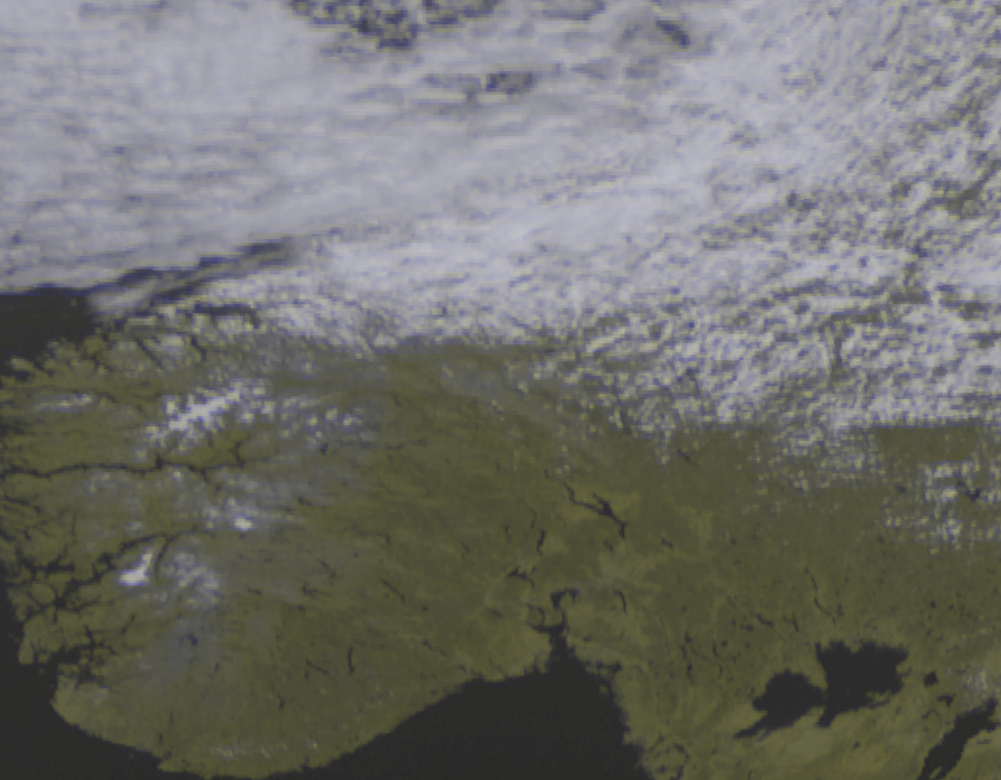

In [9]:
sat1

In [7]:
def diff_scale(ten1, ten2):
    return (ten2-ten1 - torch.min(ten2-ten1))/(torch.max(ten2-ten1)-torch.min(ten2-ten1))

def scale(ten):
    return (ten - torch.min(ten))/(torch.max(ten)-torch.min(ten))

In [29]:
toTensor = transforms.ToTensor()

In [30]:
grayTensor = scale(toTensor(sat1.pilImage.convert('L')))

In [31]:
grayTensor[grayTensor < 0.40] = 0.0

In [32]:
grayTensor.shape

torch.Size([1, 780, 1001])

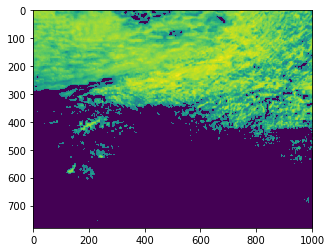

In [33]:
plt.imshow(grayTensor.numpy().reshape(grayTensor.shape[1], grayTensor.shape[2]))

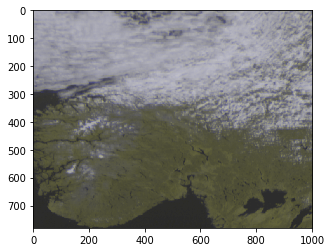

In [34]:
sat1.displayTensor()

In [520]:
ch = sat1.getTensorChannel(2)

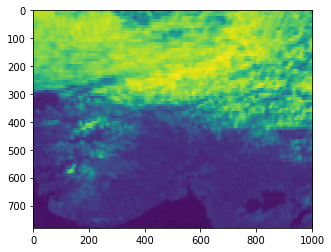

In [521]:
plt.imshow(ch.numpy().reshape(ch.shape[1], ch.shape[2]))

In [522]:
ch = (ch-torch.min(ch))/(torch.max(ch)-torch.min(ch))

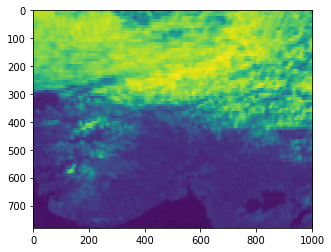

In [523]:
plt.imshow(ch.numpy().reshape(ch.shape[1], ch.shape[2]))

In [524]:
ch[ch < 0.40] = 0.0

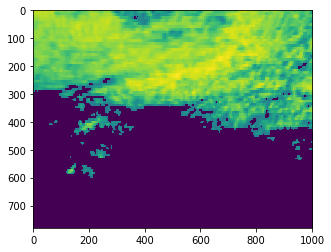

In [525]:
plt.imshow(ch.numpy().reshape(ch.shape[1], ch.shape[2]))

In [583]:
ten = sat1.tensor.clone().detach()
ten = scale(ten)
sep = 0.4
ten[ten < sep] = 0.0
#ten[ten > 0.0] = 1.0

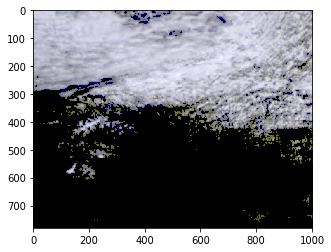

In [584]:
plt.imshow(ten.permute(1, 2, 0))
plt.show()

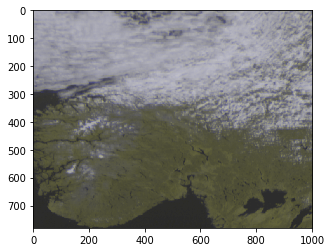

In [561]:
plt.imshow(sat1.tensor.permute(1, 2, 0))
plt.show()

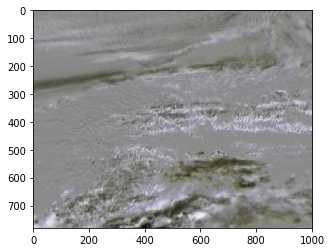

In [585]:
diffimg = diff_scale(ten1, ten2)
plt.imshow(diffimg.permute(1, 2, 0))
plt.show()